# Linear Shooting Method

To numerically approximate the Boundary Value Problem
$$
y^{''}=p(x)y^{'}+q(x)y+g(x) \ \ \ a < x < b $$
$$y(a)=\alpha$$
$$y(b) =\beta$$

The Boundary Value Problem is divided into two
Initial Value Problems:
1. The first 2nd order Intial Value Problem is the same as the original Boundary Value Problem with an extra initial condtion $y_1^{'}(a)=0$. 
\begin{equation}
 y^{''}_1=p(x)y^{'}_1+q(x)y_1+r(x), \ \    y_1(a)=\alpha, \ \ \color{green}{y^{'}_1(a)=0},\\
\end{equation}
2. The second 2nd order Intial Value Problem is the homogenous form of the original Boundary Value Problem with the initial condtions $y_2(a)=0$ and $y_2^{'}(a)=1$.

\begin{equation}
y^{''}_2=p(x)y^{'}_2+q(x)y_2, \ \ \color{green}{y_2(a)=0, \ \ y^{'}_2(a)=1}.
\end{equation}

combining these results together to get the unique solution 
\begin{equation}
y(x)=y_1(x)+\frac{\beta-y_1(b)}{y_2(b)}y_2(x)
\end{equation}
provided that $y_2(b)\not=0$.

The truncation error for the shooting method  is  
$$ |y_i - y(x_i)| \leq K h^n\left|1+\frac{w_{1 i}}{u_{1 i}}\right| $$
$O(h^n)$ is the order of the numerical method used to approximate the solution of the Initial Value Problems.


In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
    
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## Example Boundary Value Problem
To illustrate the shooting method we shall apply it to the Boundary Value Problem:
$$ y^{''}=2y^{'}+3y-6, $$
with boundary conditions
$$y(0) = 3, $$
$$y(1) = e^3+2, $$
with the exact solution is 
$$y=e^{3x}+2. $$
The __boundary value problem__ is broken into two second order __Initial Value Problems:__
1. The first 2nd order Intial Value Problem is the same as the original Boundary Value Problem with an extra initial condtion $u^{'}(0)=0$.
\begin{equation}
u^{''} =2u'+3u-6, \ \ \ \ u(0)=3, \ \ \ \color{green}{u^{'}(0)=0}
\end{equation}
2. The second 2nd order Intial Value Problem is the homogenous form of the original Boundary Value Problem with the initial condtions $w^{'}(0)=0$ and $w^{'}(0)=1$.
\begin{equation}
w^{''} =2w^{'}+3w, \ \ \ \ \color{green}{w(1)=0}, \ \ \ \color{green}{w^{'}(1)=1}
\end{equation}

combining these results of these two intial value problems as a linear sum 
\begin{equation}
y(x)=u(x)+\frac{e^{3x}+2-u(1)}{w(1)}w(x)
\end{equation}
gives the solution of the Boundary Value Problem.

## Discrete Axis
The stepsize is defined as
$$h=\frac{b-a}{N}$$
here it is 
$$h=\frac{1-0}{10}$$
giving 
$$x_i=0+0.1 i$$
for $i=0,1,...10.$



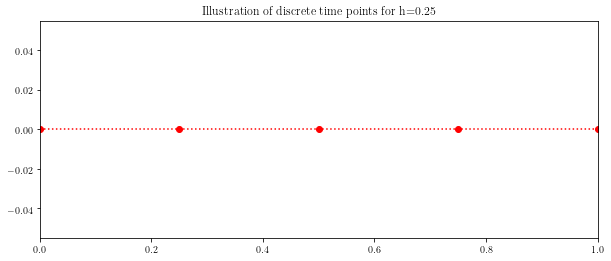

In [10]:
## BVP
N=4
h=1/N
x=np.linspace(0,1,N+1)
fig = plt.figure(figsize=(10,4))
plt.plot(x,0*x,'o:',color='red')
plt.xlim((0,1))
plt.title('Illustration of discrete time points for h=%s'%(h))

plt.show()

## Initial conditions
The initial conditions for the discrete equations are:
$$ u_1[0]=3$$
$$ \color{green}{u_2[0]=0}$$
$$ \color{green}{w_1[0]=0}$$
$$ \color{green}{w_2[0]=1}$$

In [11]:
U1=np.zeros(N+1)
U2=np.zeros(N+1)
W1=np.zeros(N+1)
W2=np.zeros(N+1)

U1[0]=2
U2[0]=0

W1[0]=0
W2[0]=1

## Numerical method
The Euler method is applied to numerically approximate the solution of the system of the two second order initial value problems they are converted in to two pairs of two first order initial value problems:

### 1. Inhomogenous Approximation
The plot below shows the numerical approximation for the two first order Intial Value Problems 
\begin{equation}
u_1^{'} =u_2, \ \ \ \ u_1(0)=3,
\end{equation}
\begin{equation}
u_2^{'} =2u_2+3u_1-6, \ \ \ \color{green}{u_2(0)=0},
\end{equation}

that Euler approximate of the inhomogeneous two Initial Value Problems is :
$$u_{1}[i+1]=u_{1}[i] + h u_{2}[i]$$
$$u_{2}[i+1]=u_{2}[i] + h (2u_{2}[i]+3u_{1}[i] -6)$$
with $u_1[0]=3$ and $\color{green}{u_2[0]=0}$.

In [12]:
for i in range (0,N):
    U1[i+1]=U1[i]+h*(U2[i])
    U2[i+1]=U2[i]+h*(2*U2[i]+3*x[i]*U1[i]+4*x[i]*x[i])


### Plots
The plot below shows the Euler approximation of the two intial value problems $u_1$ on the left and $u2$ on the right.

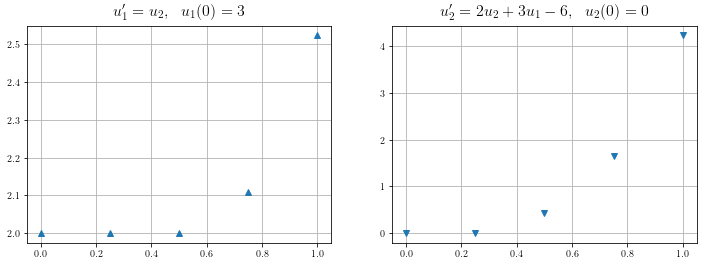

In [13]:
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(1,2,1)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.plot(x,U1,'^')
plt.title(r"$u_1'=u_2, \ \  u_1(0)=3$",fontsize=16)
plt.grid(True)

ax = fig.add_subplot(1,2,2)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.plot(x,U2,'v')
plt.title(r"$u_2'=2u_2+3u_1-6, \ \  u_2(0)=0$", fontsize=16)

plt.grid(True)
plt.show()

### 2. Homogenous Approximation
The homogeneous Bounday Value Problem is divided into two first order Intial Value Problems
\begin{equation}
w_1^{'} =w_2, \ \ \ \ \color{green}{w_1(1)=0}
\end{equation}
\begin{equation}
w_2^{'} =2w_2+3w_1,  \ \ \ \color{green}{w_2(1)=1}
\end{equation}

The Euler approximation of the homogeneous of the two Initial Value Problem is 
$$w_{1}[i+1]=w_{1}[i] + h w_{2}[i]$$
$$w_{2}[i+1]=w_{2}[i] + h (2w_{2}[i]+3w_{1}[i])$$
with $\color{green}{w_1[0]=0}$ and $\color{green}{w_2[1]=1}$.

In [14]:
for i in range (0,N):
    W1[i+1]=W1[i]+h*(W2[i])
    W2[i+1]=W2[i]+h*(W2[i]+3*x[i]*W1[i])

### Homogenous Approximation

### Plots
The plot below shows the Euler approximation of the two intial value problems $u_1$ on the left and $u2$ on the right.

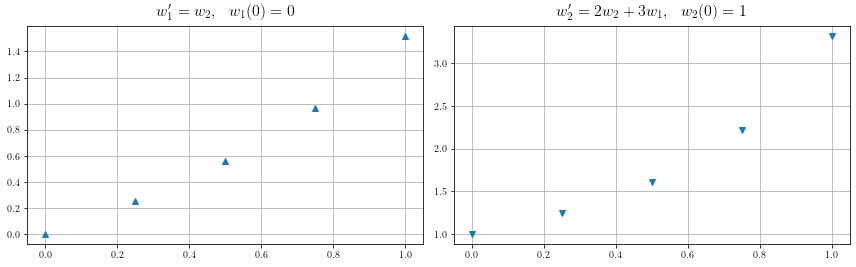

In [15]:
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(1,2,1)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.plot(x,W1,'^')
plt.grid(True)
plt.title(r"$w_1'=w_2, \ \  w_1(0)=0$",fontsize=16)

ax = fig.add_subplot(1,2,2)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.plot(x,W2,'v')
plt.grid(True)
plt.title(r"$w_2'=2w_2+3w_1, \ \  w_2(0)=1$",fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.85)

plt.show()
beta=-1
y=U1+(beta-U1[N])/W1[N]*W1

## Approximate Solution
Combining together the numerical approximation of $u_1$ and $u_2$ as a weighted sum  
$$y(x[i])\approx u_{1}[i] + \frac{e^3+2-u_{1}[N]}{w_1[N]}w_{1}[i]$$
gives the approximate solution of the Boundary Value Problem.


The truncation error for the shooting method using the Euler method is  
$$ |y_i - y(x[i])| \leq K h\left|1+\frac{w_{1}[i]}{u_{1}[i]}\right| $$
$O(h)$ is the order of the method.

The plot below shows the approximate solution of the Boundary Value Problem (left), the exact solution (middle) and the error (right) 

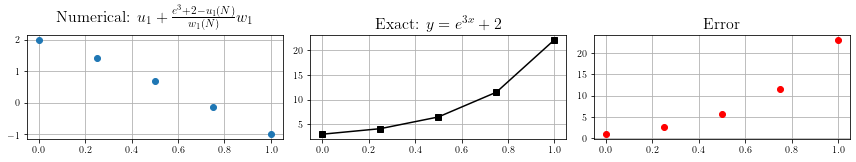

In [16]:
Exact=np.exp(3*x)+2
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(2,3,1)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.plot(x,y,'o')

plt.grid(True)
plt.title(r"Numerical: $u_1+\frac{e^3+2-u_1(N)}{w_1(N)}w_1$",
          fontsize=16)

ax = fig.add_subplot(2,3,2)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.plot(x,Exact,'ks-')

plt.grid(True)
plt.title(r"Exact: $y=e^{3x}+2$",
          fontsize=16)

ax = fig.add_subplot(2,3,3)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.plot(x,abs(y-Exact),'ro')
plt.grid(True)
plt.title(r"Error ",fontsize=16)
          
plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()

### Data
The Table below shows that output for $x$, the Euler numerical approximations $U1$, $U2$, $W1$ and $W2$ of the system of four Intial Value Problems, the shooting methods approximate solution $y_i=u_{1 i} + \frac{e^3+2-u_{1}(x_N)}{w_1(x_N)}w_{1 i}$ and the exact solution of the Boundary Value Problem.

In [9]:
table = ListTable()
table.append(['x', 'U1','U2','W1','W2','Approx','Exact'])
for i in range (0,len(x)):
    table.append([round(x[i],3), round(U1[i],3), round(U2[i],3),
                  round(W1[i],5),round(W2[i],3),
                  round(y[i],5),
                 round(Exact[i],5)])
table

x,U1,U2,W1,W2,Approx,Exact
0.0,2.0,0.0,0.0,1.0,2.0,3.0
0.1,2.0,0.0,0.1,1.1,1.76075,3.34986
0.2,2.0,0.064,0.21,1.213,1.49757,3.82212
0.3,2.006,0.213,0.3313,1.347,1.21375,4.4596
0.4,2.028,0.472,0.46599,1.511,0.91278,5.32012
0.5,2.075,0.874,0.61713,1.718,0.59836,6.48169
0.6,2.162,1.46,0.78898,1.983,0.27458,8.04965
0.7,2.308,2.285,0.98727,2.323,-0.05388,10.16617
0.8,2.537,3.422,1.21958,2.763,-0.38124,13.02318
0.9,2.879,4.972,1.49587,3.332,-0.70002,16.87973
